In [2]:
from functions import *
import numpy as np
import pandas as pd
from functions import *
from questions import *
from visualization import *
from models import *

In [3]:
%load_ext autoreload
%autoreload 2

Make pandas display everything

#show all rows
pd.set_option('display.max_rows', None)

#set the display option to show all columns
pd.set_option('display.max_columns', None)

#show the full width of each column
pd.set_option('display.max_colwidth', None)

# show the full width of the DataFrame
pd.set_option('display.width', None)

In [4]:
#From here and on, our script starts executing
dataframe1, dataframe2 = read_files()

In [5]:
#do a minor edit in df1 so as to have all split product codes saved as a set
dataframe1, dataframe2 = edit_dfs(dataframe1, dataframe2)

Index(['Practical Information', 'Product Code and Name', 'Unnamed: 2',
       'Qualitative Information - Findings', 'Unnamed: 4', 'Unnamed: 5',
       'Experience', 'month', 'Unnamed: 0', 'Reviews', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9', 'Product Code', 'Name of Product',
       'split_product_code', 'Country', 'language', 'split_product_codes',
       'Standardized_Experience', 'number_of_stories'],
      dtype='object')


c:\Users\steve\Clio_Muse Data Analysis Project\functions.py:309: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  dataframe1['booking_date'] = pd.to_datetime(dataframe1['booking_date'], dayfirst=True)


In [6]:
#add profit to dataframe2
dataframe2 = add_df2_profit(dataframe1, dataframe2)

In [7]:
#which tours go together?
go_together = which_tours_go_together(dataframe1, dataframe2)

Note that this function does not filter based on profit, it just groups tours together based on their occurences.

In [8]:
pd.set_option('display.max_colwidth', None)  # None means no limit on column width
go_together

,product_combinations,Occurrences,Average_Profit,tour_names
23,"(537DE, STL539)",1689,20.760805,"Unknown, Quinta da Regaleira E-Ticket with Audio and Sintra City Tour"
19,"(492EN, STL535)",1138,34.249209,"Unknown, Cordoba: Mosque-Cathedral Skip-the-Line E-Ticket with Audio"
16,"(490DE, STL512)",1078,35.521336,"Unknown, Lisbon: Saint George's Castle Entry & City Self-Guided Tours"
21,"(525, 526, 537EN, STL539)",878,45.065626,"Unknown, Sintra: Moorish Castle Entrance E-Ticket With Audio Tour, Moorish Castle & Quinta da Regaleira Tickets with 3 Audios, Quinta da Regaleira E-Ticket with Audio and Sintra City Tour"
2,"(181, 459DE, 51, TO240)",856,11.691589,"Acropolis & 6 Archaeological Sites Combo Ticket, Unknown, Acropolis & 6 Archaeological Sites Combo Ticket, Acropolis Hill and Acropolis Museum Entry Tickets"
4,"(226DE, STL107)",809,31.838875,"Unknown, Knossos Palace and Archaeological Museum Tickets and Audio"
13,"(447DE, STL55)",549,30.764299,"Unknown, National Arch. Museum e-Ticket & Athens City Audio Tours"
6,"(288DE, STL284)",470,40.600894,"Unknown, Rome: Castel Sant’ Angelo Skip-the-Line Ticket & Audio Guide"
0,"(181, 278DE, 51, TO240)",427,41.723653,"Acropolis & 6 Archaeological Sites Combo Ticket, Unknown, Acropolis & 6 Archaeological Sites Combo Ticket, Acropolis Hill and Acropolis Museum Entry Tickets"
24,"(537EN, STL539)",397,18.229723,"Moorish Castle & Quinta da Regaleira Tickets with 3 Audios, Quinta da Regaleira E-Ticket with Audio and Sintra City Tour"


In [9]:
#how does a successful tour look like?
successful = successful_tour_looks_like(dataframe1, dataframe2)

Here are the charachteristics of tours that have a profit higher than the mean, as well as the most popular tours per country and month.

In [10]:
successful.head(12)

,Country,month,most_common_tour,average_travellers,Total_Travellers,Average_number_of_products,Total_profit,Average_profit,Top_3_travel_days,Average_Money_Spent_per_group,average_money_spent_per_traveller,most_common_languages,most_common_number_of_stories,country_mean_profit
26,Portugal,May,[Quinta da Regaleira + Sintra City Tour],2.499621,1321,2.299773,35984.00,27.239970,"[(Monday, 234), (Wednesday, 215), (Tuesday, 184)]",57.202877,22.902725,[English],2,17651.843636
1,Greece,August,[Acropolis & 6 Archaeological Sites Combo Ticket],2.630172,1160,2.363793,34498.77,29.740319,"[(Wednesday, 207), (Thursday, 178), (Monday, 173)]",59.514336,22.565397,[English],1,14078.796364
20,Portugal,August,[Quinta da Regaleira Entry Ticket],2.675569,1011,1.645895,31614.92,31.270940,"[(Wednesday, 173), (Thursday, 160), (Tuesday, 155)]",55.802572,21.209496,[English],1,17651.843636
19,Portugal,April,[Quinta da Regaleira + Sintra City Tour],2.655879,927,2.462783,27566.00,29.736785,"[(Sunday, 160), (Monday, 157), (Saturday, 153)]",61.887810,23.377562,[English],2,17651.843636
5,Greece,June,[Knossos: Pre-booked e-Ticket with 2 Audio Tour],2.515607,865,2.035838,26291.50,30.394798,"[(Thursday, 150), (Friday, 144), (Wednesday, 119)]",57.303468,22.730058,[English],2,14078.796364
24,Portugal,June,[Quinta da Regaleira + Sintra City Tour],2.559563,915,2.293989,26122.70,28.549399,"[(Friday, 172), (Thursday, 155), (Monday, 155)]",58.585464,22.951148,[English],2,17651.843636
7,Greece,May,[Knossos: Pre-booked e-Ticket with 2 Audio Tour],2.410047,856,2.147196,22866.78,26.713528,"[(Wednesday, 163), (Tuesday, 153), (Friday, 137)]",54.496098,22.589217,[English],2,14078.796364
29,Portugal,September,[Quinta da Regaleira Entry Ticket],2.397810,822,1.594891,21893.00,26.633820,"[(Wednesday, 133), (Friday, 126), (Saturday, 121)]",50.278589,21.155109,[English],1,17651.843636
28,Portugal,October,[Quinta da Regaleira Entry Ticket],2.442928,806,1.607940,21277.75,26.399194,"[(Saturday, 126), (Sunday, 125), (Monday, 119)]",49.378102,20.234057,[English],1,17651.843636
10,Greece,September,[NAM Entry Ticket],2.326406,818,1.715159,20546.07,25.117445,"[(Friday, 161), (Wednesday, 128), (Thursday, 116)]",49.647812,21.146809,[English],1,14078.796364


In [11]:
#which tours do we recommend to a traveller?
which_tours_do_we_recommend_to_a_traveller(dataframe1, dataframe2, go_together)

In [12]:
save_to_excel(dataframe1, dataframe2)

In [13]:
from IPython.display import display
display(dataframe1.head(5))

,id,reference_code,travel_date,booking_date,booking_status,split_product_code,language,tours,product_title,product_type,...,Ticket Price,Profit,split_product_codes,booking_day,booking_hour,travel_day,travel_day_number,travel_month,number_of_stories,money_spent_per_traveller
0,98825,GYGX7Q4WHBX3,2023-01-05,2022-12-13 23:11:00,ACTIVE,STL284,English,284,Castel Sant’ Angelo: Skip-the-Line Ticket & Audio Tour,Skip-the-Line,...,34.00,24.00,"{STL284, 288DE}",Tuesday,23,Thursday,travel_date,1,2,29.00
8,98826,GYG32NWHYK2Z,2023-01-03,2022-12-13 23:04:00,ACTIVE,STL526,English,526,Moorish Castle: Skip-The-Line e-ticket with Audio Tour,Skip-the-Line,...,35.00,19.00,"{STL526, 539, 537DE}",Tuesday,23,Tuesday,travel_date,1,3,18.00
18,98828,GYGMX57A5K6H,2023-01-03,2022-12-13 23:06:00,ACTIVE,STL539,Spanish,539,Quinta da Regaleira: Skip-The-Line e-ticket with Audio Tour - Spanish,Skip-the-Line,...,26.00,16.00,"{STL539, 537EN}",Tuesday,23,Tuesday,travel_date,1,2,21.00
26,98855,GYG83Y54QLYF,2023-01-07,2022-12-14 11:02:00,ACTIVE,STL55,Italian,55,National Archaeological Museum: Skip-The-Line e-ticket with Audio Tour - Italian,Skip-the-Line,...,16.00,26.00,"{STL55, 447DE}",Wednesday,11,Saturday,travel_date,1,2,14.00
39,98877,GYG2RA8L48HY,2023-01-18,2022-12-15 07:34:00,ACTIVE,AU226,English,226,Heraklion: the Castle of the Moat,Audio,...,9.99,9.99,{AU226DE},Thursday,7,Wednesday,travel_date,1,1,9.99


In [14]:
dataframe2.head(5)

,Practical Information,Product Code and Name,Unnamed: 2,Qualitative Information - Findings,Unnamed: 4,Unnamed: 5,Experience,month,Product Code,Name of Product,split_product_code,Country,language,split_product_codes,Standardized_Experience,number_of_stories,Profit
0,Important Information,Name of Product Reviewed,Review,Content,Technology,Customer Support,Overall Experience,January,Name of Product Reviewed,None,Name of Product Reviewed,NaN,NaN,{Name of Product Reviewed},NaN,1,NaN
1,False,STL55 | Athens National Archaeological Museum Ticket with Audio Tour,"Without the Audio Guide I would not have understood a lot of this. Since I do not speak or read Greek, the Audio Guide is really highly recommended. Although not every piece in the museum is explained, the information was enough for me. Handling downloads and playback is usually simple. However, I would book the tour two days in advance, as you have to download an app for the audio file. I also recommend good headphones.",NaN,NaN,NaN,Excellent (5 stars),January,STL55,Athens National Archaeological Museum Ticket with Audio Tour,STL55,NaN,NaN,{STL55},5,1,26.0
2,False,TO240_181_51_459 | Acropolis & 6 Archaeological Sites Combo Ticket,"I liked it a lot, you know different things about the city as well as including the tickets to the typical tourist attractions of Athens. The only thing I find is that in such typical monuments you do not have a short audio guide, although there are other audio guides more specific for each particular monument. . . an introduction or short explanation would not be wrong.",NaN,NaN,NaN,Positive (4 stars),January,TO240_181_51_459,Acropolis & 6 Archaeological Sites Combo Ticket,TO240,Greece,English,"{459, 181, TO240, 51}",4,4,12.0
8,False,TO240_181_51_459 | Acropolis & 6 Archaeological Sites Combo Ticket,"I liked it a lot, you know different things about the city as well as including the tickets to the typical tourist attractions of Athens. The only thing I find is that in such typical monuments you do not have a short audio guide, although there are other audio guides more specific for each particular monument. . . an introduction or short explanation would not be wrong.",NaN,NaN,NaN,Positive (4 stars),January,TO240_181_51_459,Acropolis & 6 Archaeological Sites Combo Ticket,TO240,Greece,Spanish,"{459, 181, TO240, 51}",4,4,12.0
60,False,TO240_181_51_459 | Acropolis & 6 Archaeological Sites Combo Ticket,"I liked it a lot, you know different things about the city as well as including the tickets to the typical tourist attractions of Athens. The only thing I find is that in such typical monuments you do not have a short audio guide, although there are other audio guides more specific for each particular monument. . . an introduction or short explanation would not be wrong.",NaN,NaN,NaN,Positive (4 stars),January,TO240_181_51_459,Acropolis & 6 Archaeological Sites Combo Ticket,TO240,Greece,Italian,"{459, 181, TO240, 51}",4,4,12.0


c:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) 

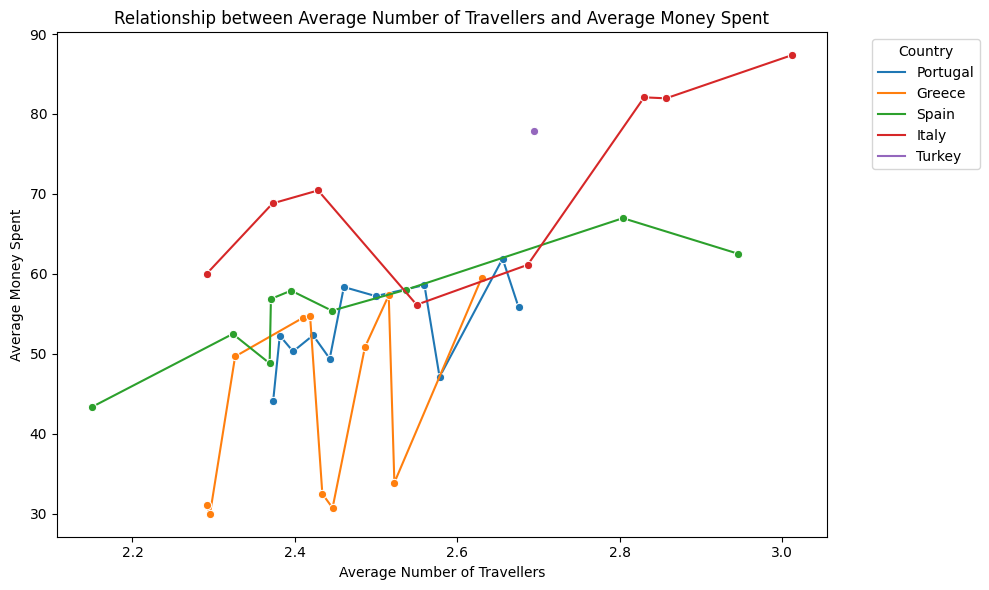

In [15]:
travellers_vs_spending_with_months(dataframe1)


Note: The average number of travellers per country changes depending on the month.

c:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


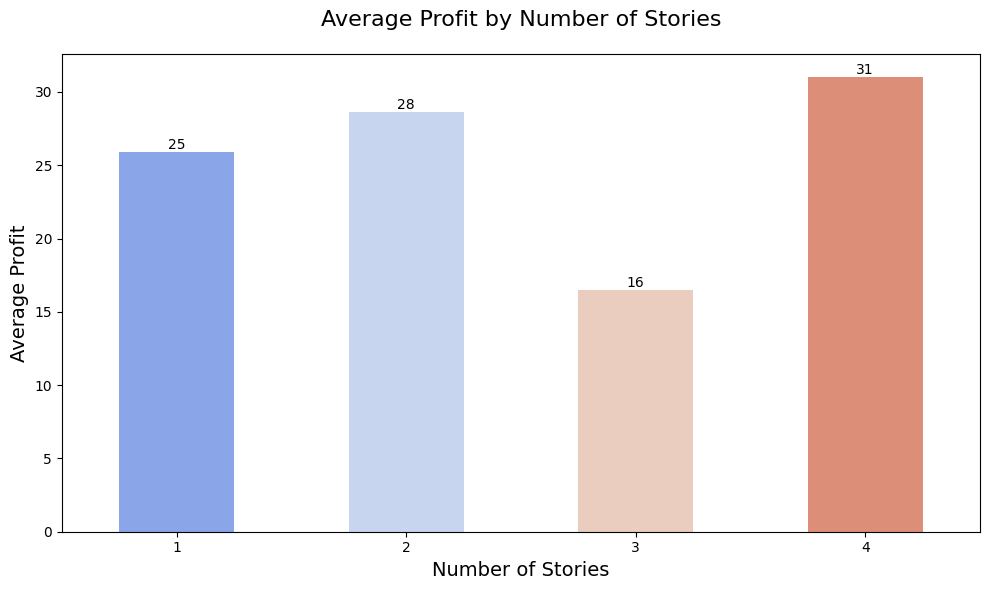

,Number of Stories,Average Profit
0,1,25.926304
1,2,28.611188
2,3,16.465882
3,4,31.048301


In [16]:
optimum_number_of_stories_profit(dataframe1)

c:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


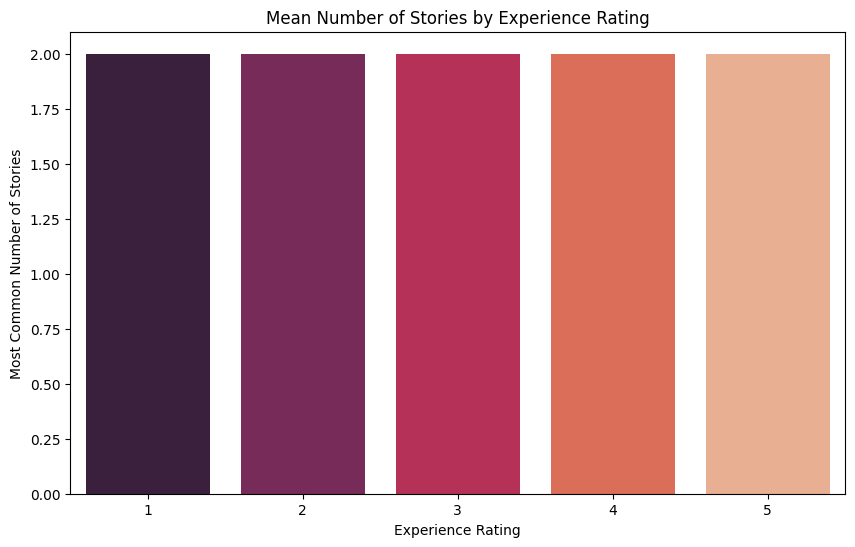

In [17]:
optimum_number_of_stories_liked(dataframe2)

We can see that the most common number of stories per booking is 2, regardless of user experience.
We can deduct that it is better to strive for 2 stories then.

In [18]:
dataframe1.columns

Index(['id', 'reference_code', 'travel_date', 'booking_date', 'booking_status',
       'split_product_code', 'language', 'tours', 'product_title',
       'product_type', 'product_country', 'seller_name', 'seller_id', 'month',
       'task_id', 'channel', 'num_of_travellers', 'retail_price', 'net_price',
       'product_code', 'stories', 'Country', 'Ticket Price', 'Profit',
       'split_product_codes', 'booking_day', 'booking_hour', 'travel_day',
       'travel_day_number', 'travel_month', 'number_of_stories',
       'money_spent_per_traveller'],
      dtype='object')

In [19]:
dataframe2.columns

Index(['Practical Information', 'Product Code and Name', 'Unnamed: 2',
       'Qualitative Information - Findings', 'Unnamed: 4', 'Unnamed: 5',
       'Experience', 'month', 'Product Code', 'Name of Product',
       'split_product_code', 'Country', 'language', 'split_product_codes',
       'Standardized_Experience', 'number_of_stories', 'Profit'],
      dtype='object')

Let us run an association rules algorithm, to get a better idea of which tours go together


In [20]:
#frequent_tours, rules = find_frequent_product_combinations(dataframe1)

Most frequent itemsets;

In [21]:
#frequent_tours

The most frequent itemsets are;

In [22]:
#rules

Create  a product code to product title mapping for dataframe1.

In [23]:
product_code_to_title = dict(zip(dataframe1['product_code'], dataframe1['product_title']))

In [24]:
associate_together(dataframe1, product_code_to_title)

KeyError: '181'

For each country, find the 5 most common hours of booking tickets

In [ ]:
common_booking_hours(dataframe1)

,Country,Most_Common_Booking_hours
0,Austria,"14, 19, 16, 13, 15"
1,China,"2, 15, 4"
2,Egypt,"1, 20, 15, 4, 7, 12"
3,Germany,"13, 12, 9"
4,Greece,"8, 9, 7, 19, 18, 17"
5,Hungary,"15, 18, 0, 8"
6,Italy,"19, 18, 20, 15, 17, 14"
7,Portugal,"10, 9, 11, 8, 12, 20"
8,Spain,"18, 9, 19, 16, 14, 13"
9,The Netherlands,"14, 11, 7, 9, 20"


In [ ]:
successful_tour_looks_like_without_months(dataframe1, dataframe2)

,Country,most_common_tour,average_travellers,Total_Travellers,Average_number_of_products,Total_profit,Average_profit,Top_3_travel_days,Average_Money_Spent_per_group,average_money_spent_per_traveller,most_common_languages,most_common_number_of_stories
7,Portugal,[Quinta da Regaleira + Sintra City Tour],2.523301,7017,1.998290,194170.28,27.671409,"[(Monday, 1109), (Friday, 1074), (Saturday, 1022)]",55.040010,21.908028,[English],2
4,Greece,[Acropolis & 6 Archaeological Sites Combo Ticket],2.461040,6173,1.949133,154866.76,25.087763,"[(Friday, 983), (Wednesday, 949), (Saturday, 883)]",50.332088,20.338547,[English],1
8,Spain,[Entry e-tickets for The Mosque-Cathedral of Cordoba with an audio tour of the city of Cordoba],2.475638,1724,1.705916,53956.57,31.297314,"[(Thursday, 266), (Saturday, 247), (Wednesday, 246)]",55.324872,22.326961,[English],2
6,Italy,[Castel Sant’ Angelo: E-ticket + Rome City Tour],2.616822,535,1.878505,20718.18,38.725570,"[(Wednesday, 101), (Sunday, 101), (Thursday, 92)]",70.833626,26.948804,[English],2
10,Turkey,[Ephesus: the Ancient Pearl of the Mediterranean Skip-the-line Ticket],2.503876,129,1.000000,5512.48,42.732403,"[(Wednesday, 22), (Tuesday, 20), (Thursday, 19)]",74.267132,29.976589,[English],1
2,Egypt,[Karnak Temple: Entrance e-ticket with Audio Tour],2.300000,20,1.000000,522.00,26.100000,"[(Thursday, 7), (Wednesday, 5), (Saturday, 3)]",46.000000,19.900000,[English],1
5,Hungary,[Vajdahunyad Castle e-ticket + audio],2.500000,4,1.000000,81.60,20.400000,"[(Wednesday, 1), (Thursday, 1), (Sunday, 1)]",37.400000,15.087500,[English],1
0,Austria,[Vienna City Tour: Waltzing through Memory],2.400000,5,1.000000,69.93,13.986000,"[(Saturday, 3), (Friday, 1), (Tuesday, 1)]",23.976000,9.990000,[English],1
1,China,[Hong Kong City Tour: A junction of cultures],2.750000,4,1.000000,53.95,13.487500,"[(Monday, 1), (Friday, 1), (Saturday, 1)]",23.477500,7.992500,[English],1
3,Germany,[Berlin City Tour: The heart of Mitteleuropa],2.500000,4,1.000000,53.94,13.485000,"[(Thursday, 2), (Friday, 1), (Saturday, 1)]",23.475000,9.240000,[English],1


c:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) 

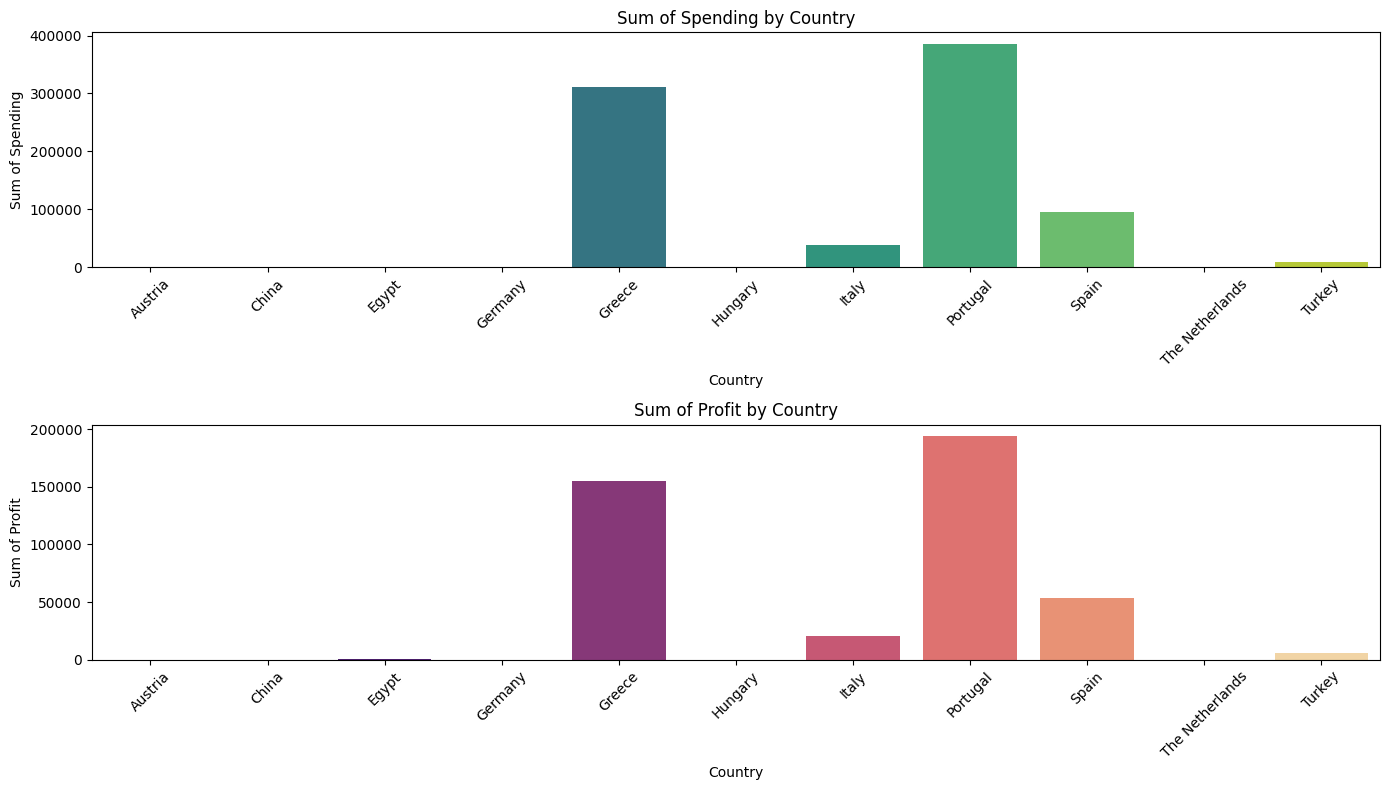

In [ ]:
country_spending(dataframe1)

In [ ]:
clusters(dataframe1)

NameError: name 'clusters' is not defined